In [1]:
import json
import requests
import pandas as pd
#from config import gkey
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
#read in covid data per city in LA
file = "Covid_LA.csv"
la_covid = pd.read_csv(file)
la_covid.head()

,City,Cases,Case_rate,Deaths,Death_rate
0,Agoura Hills,164,785,1,5
1,Alhambra,1292,1490,28,32
2,Arcadia,514,890,34,59
3,Artesia,383,2280,10,60
4,Avalon,6,155,0,0


In [3]:
#make city upper case for feeding in to next json
la_covid['City'] = la_covid['City'].str.upper()
la_covid.head()

,City,Cases,Case_rate,Deaths,Death_rate
0,AGOURA HILLS,164,785,1,5
1,ALHAMBRA,1292,1490,28,32
2,ARCADIA,514,890,34,59
3,ARTESIA,383,2280,10,60
4,AVALON,6,155,0,0


In [4]:
#number of full-service restaurants in each city
data = "https://data.lacity.org/resource/6rrh-rzua.json?"
field = "Full-service restaurants"


y = 0
for x in la_covid['City']:
    target = data + f"city={x}" + f"&primary_naics_description={field}" + "&$limit=5000"  
    response = requests.get(target).json()
    restaurants = len(response)
    la_covid.loc[y, 'Number_of_restaurants'] = restaurants
    y = y + 1
    print(f"The number of restaurants in city {x} is {restaurants}")


The number of restaurants in city AGOURA HILLS is 2
The number of restaurants in city ALHAMBRA is 1
The number of restaurants in city ARCADIA is 0
The number of restaurants in city ARTESIA is 0
The number of restaurants in city AVALON is 0
The number of restaurants in city AZUSA is 0
The number of restaurants in city BALDWIN PARK is 3
The number of restaurants in city BELL is 1
The number of restaurants in city BELL GARDENS is 1
The number of restaurants in city BELLFLOWER is 1
The number of restaurants in city BEVERLY HILLS is 8
The number of restaurants in city BRADBURY is 0
The number of restaurants in city BURBANK is 10
The number of restaurants in city CALABASAS is 4
The number of restaurants in city CARSON is 0
The number of restaurants in city CERRITOS is 0
The number of restaurants in city CLAREMONT is 0
The number of restaurants in city COMMERCE is 0
The number of restaurants in city COMPTON is 1
The number of restaurants in city COVINA is 0
The number of restaurants in city C

The number of restaurants in city MISSION HILLS is 23
The number of restaurants in city MT. WASHINGTON is 0
The number of restaurants in city NORTH HILLS is 42
The number of restaurants in city NORTH HOLLYWOOD is 176
The number of restaurants in city NORTHRIDGE is 190
The number of restaurants in city PACIFIC PALISADES is 28
The number of restaurants in city PACOIMA is 60
The number of restaurants in city PALISADES HIGHLANDS is 0
The number of restaurants in city PALMS is 0
The number of restaurants in city PANORAMA CITY is 79
The number of restaurants in city PARK LA BREA is 0
The number of restaurants in city PICO-UNION is 0
The number of restaurants in city PLAYA DEL REY is 16
The number of restaurants in city PLAYA VISTA is 11
The number of restaurants in city PORTER RANCH is 10
The number of restaurants in city RANCHO PARK is 0
The number of restaurants in city REGENT SQUARE is 0
The number of restaurants in city RESEDA is 99
The number of restaurants in city RESEDA RANCH is 0
The

The number of restaurants in city SOUTH WHITTIER is 0
The number of restaurants in city SOUTHEAST ANTELOPE VALLEY is 0
The number of restaurants in city STEVENSON RANCH is 1
The number of restaurants in city SUN VILLAGE is 0
The number of restaurants in city SUNRISE VILLAGE is 0
The number of restaurants in city TWIN LAKES/OAT MOUNTAIN is 0
The number of restaurants in city VAL VERDE is 0
The number of restaurants in city VALENCIA is 3
The number of restaurants in city VALINDA is 0
The number of restaurants in city VIEW PARK/WINDSOR HILLS is 0
The number of restaurants in city WALNUT PARK is 0
The number of restaurants in city WEST ANTELOPE VALLEY is 0
The number of restaurants in city WEST CARSON is 0
The number of restaurants in city WEST CHATSWORTH is 0
The number of restaurants in city WEST LA is 0
The number of restaurants in city WEST PUENTE VALLEY is 0
The number of restaurants in city WEST RANCHO DOMINGUEZ is 0
The number of restaurants in city WEST WHITTIER/LOS NIETOS is 0
The

In [5]:
la_covid.head(10)

,City,Cases,Case_rate,Deaths,Death_rate,Number_of_restaurants
0,AGOURA HILLS,164,785,1,5,2.0
1,ALHAMBRA,1292,1490,28,32,1.0
2,ARCADIA,514,890,34,59,0.0
3,ARTESIA,383,2280,10,60,0.0
4,AVALON,6,155,0,0,0.0
5,AZUSA,1570,3137,23,46,0.0
6,BALDWIN PARK,3068,3996,89,116,3.0
7,BELL,1635,4500,41,113,1.0
8,BELL GARDENS,2008,4662,22,51,1.0
9,BELLFLOWER,2419,3112,60,77,1.0


In [6]:
#drop out cities with no restaurants
indexNames = la_covid[(la_covid['Number_of_restaurants'] == 0)].index
la_covid.drop(indexNames, inplace=True)
la_covid.head()

,City,Cases,Case_rate,Deaths,Death_rate,Number_of_restaurants
0,AGOURA HILLS,164,785,1,5,2.0
1,ALHAMBRA,1292,1490,28,32,1.0
6,BALDWIN PARK,3068,3996,89,116,3.0
7,BELL,1635,4500,41,113,1.0
8,BELL GARDENS,2008,4662,22,51,1.0


In [8]:
#calculate covid and restaurants per capita
la_covid['Cases'] = la_covid['Cases'].astype(float)
la_covid['Case_rate'] = la_covid['Case_rate'].astype(float)
la_covid['Number_of_restaurants'] = la_covid['Number_of_restaurants'].astype(float)
la_covid['Population'] = round(la_covid['Cases']/la_covid['Case_rate']*100000)
la_covid['Restaurants_per1k'] = (la_covid['Number_of_restaurants']/la_covid['Population']*1000)
la_covid.head()

,City,Cases,Case_rate,Deaths,Death_rate,Number_of_restaurants,Population,Restaurants_per1k
0,AGOURA HILLS,164.0,785.0,1,5,2.0,20892.0,0.095730
1,ALHAMBRA,1292.0,1490.0,28,32,1.0,86711.0,0.011533
6,BALDWIN PARK,3068.0,3996.0,89,116,3.0,76777.0,0.039074
7,BELL,1635.0,4500.0,41,113,1.0,36333.0,0.027523
8,BELL GARDENS,2008.0,4662.0,22,51,1.0,43072.0,0.023217


In [62]:
la_covid.to_csv('city_vs_restaurants_la.csv')

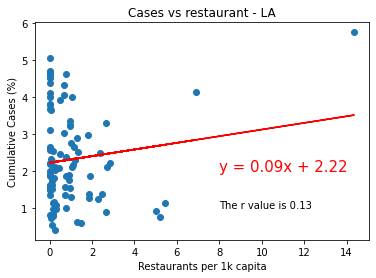

The r value is 0.13
The p value is 0.2


In [46]:
#plot restaurants  x, covid y
case_rate = la_covid['Case_rate']/1000
restaurants = la_covid['Restaurants_per1k']

(slope, intercept, rvalue, pvalue, stderr) = linregress(restaurants, case_rate)
regress_values = restaurants * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(restaurants, case_rate)
plt.plot(restaurants,regress_values,"r-")
plt.annotate(line_eq,(8,2),fontsize=15,color="red")
plt.annotate(f"The r value is {round(rvalue,2)}", (8,1))
plt.xlabel('Restaurants per 1k capita')
plt.ylabel('Cumulative Cases (%)')
plt.title('Cases vs restaurant - LA')
#plt.xlim(0,4)
plt.savefig('Cases_vs_restaurants_LA_full')
plt.show()
print(f"The r value is {round(rvalue,2)}")
print(f"The p value is {round(pvalue, 2)}")

In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. \n",
quartiles = la_covid['Restaurants_per1k'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

la_covid_adj = la_covid.loc[(la_covid['Restaurants_per1k'] < upper_bound) & (la_covid['Restaurants_per1k'] > lower_bound)]


86
95


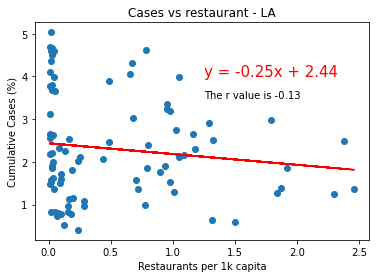

The r value is -0.13
The p value is 0.23


In [45]:
#plot with outliers removed
restaurants_adj = la_covid_adj['Restaurants_per1k']
cases_adj = la_covid_adj['Case_rate']/1000

(slope, intercept, rvalue, pvalue, stderr) = linregress(restaurants_adj, cases_adj)
regress_values = restaurants_adj * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(restaurants_adj, cases_adj)
plt.plot(restaurants_adj,regress_values,"r-")
plt.annotate(line_eq,(1.25,4),fontsize=15,color="red")
plt.annotate(f"The r value is {round(rvalue,2)}", (1.25,3.5))
plt.xlabel('Restaurants per 1k capita')
plt.ylabel('Cumulative Cases (%)')
plt.title('Cases vs restaurant - LA')
#plt.xlim(0,4)
plt.savefig('Cases_vs_restaurants_LA_Adj')
plt.show()
print(f"The r value is {round(rvalue,2)}")
print(f"The p value is {round(pvalue, 2)}")
